In [1]:
import pandas as pd

In [2]:
taxi = pd.read_csv('3_taxi_peru.csv', sep=';')

In [3]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaN,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaN,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


<li><b><i>Приведите столбцы start_at, end_at, arrived_at к формату даты. </li></b></i>
<li><b><i>Отфильтруйте данные и оставьте наблюдения со статусом заказа "asap" и "reserved"</li></b></i>

In [4]:
taxi['start_at'] = pd.to_datetime(taxi.start_at)
taxi['end_at'] = pd.to_datetime(taxi.end_at)
taxi['arrived_at'] = pd.to_datetime(taxi.arrived_at)

In [5]:
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object

In [6]:
taxi[['start_at', 'end_at', 'arrived_at']].apply(pd.to_datetime)

,start_at,end_at,arrived_at
0,2010-11-16 16:44:00,2010-11-16 17:29:00,2010-11-16 17:02:00
1,2010-06-01 00:34:00,2010-06-01 00:37:00,NaT
2,2010-05-31 05:01:00,2010-05-31 05:04:00,NaT
3,2010-06-01 00:29:00,2010-06-01 00:32:00,NaT
4,2010-09-11 23:55:00,2010-09-12 01:07:00,2010-09-11 23:50:00
...,...,...,...
23106,2010-07-31 13:15:00,2010-07-31 13:27:00,2010-07-31 13:15:00
23107,2010-10-02 05:26:00,2010-10-02 05:56:00,2010-10-02 05:39:00
23108,2010-09-21 09:56:00,2010-09-21 10:18:00,2010-09-21 10:05:00
23109,2010-04-29 04:30:00,2010-04-29 05:11:00,2010-04-29 04:23:00


In [7]:
taxi = taxi.query('start_type == "asap" or start_type == "reserved"')

<li><b><i>Создайте колонку wait_time, в которой будет храниться разница между временем подачи машины (arrived_at)
и временем заказа (start_at) в минутах.</li></b></i>

In [8]:
taxi.loc[:,'wait_time'] = (taxi.arrived_at - taxi.start_at).astype('timedelta64[m]')

In [9]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0


<li><b><i>Какие водители опаздывали на заказы к определенному времени (start_type == 'reserved').</i></b></li>

In [14]:
taxi.query('start_type == "reserved" and wait_time > 0') \
    .groupby('driver_id') \
    .agg({'user_id': 'count'}) \
    .rename(columns={'user_id': 'late_number'}) \
    .idxmax()

late_number    406921adcca37705ef527b4246c0cfea
dtype: object

<li><b><i>Добавить столбец month, где будет храниться месяц, в котором был сделан заказ (start_at), и weekday – название дня недели</i></b></li>

In [17]:
taxi.loc[:, 'month'] = taxi.start_at.dt.month

In [19]:
taxi.loc[:, 'weekday'] = taxi.start_at.dt.strftime('%A')

In [21]:
taxi[['month', 'weekday']].head(3)

,month,weekday
0,11,Tuesday
1,6,Tuesday
2,5,Monday


<li><b><i>Построить график числа заказов по месяцам (month)</i></b></li>

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

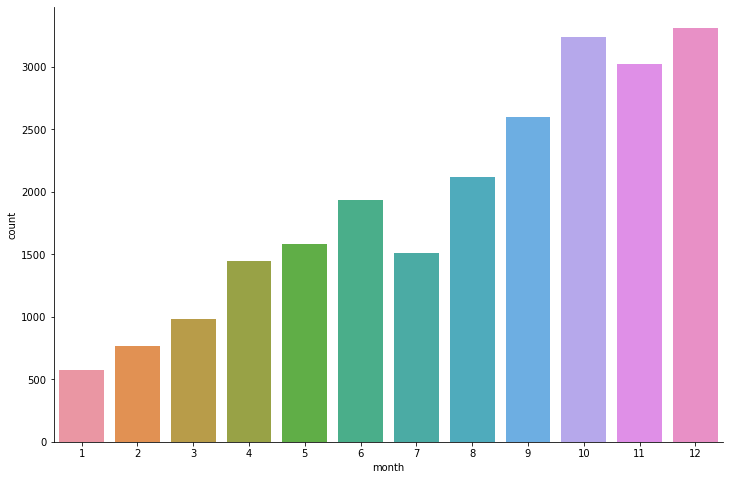

In [27]:
plt.figure(figsize=(12, 8))
sns.countplot(taxi.month)
sns.despine()

<li><b><i>Построить график по дням недели (weekday).</i></b></li>

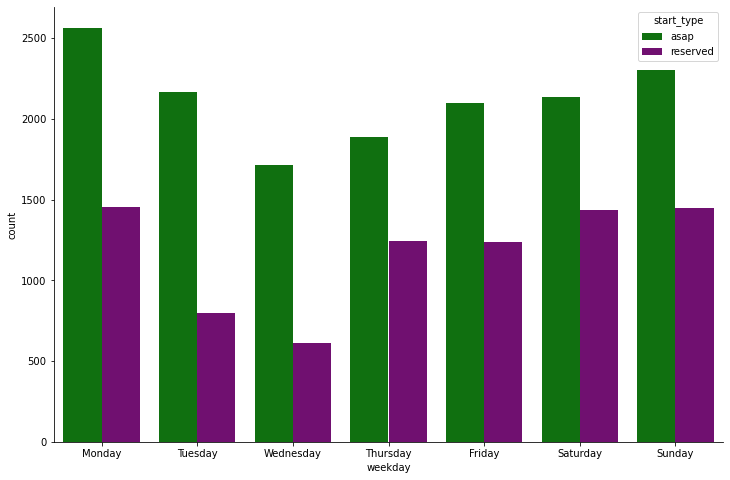

In [32]:
plt.figure(figsize=(12, 8))
sns.countplot('weekday',
              data=taxi, 
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
              hue='start_type',
              palette=['green', 'purple'])
sns.despine()

<li><b><i>Расчитать MAU (monthly active users) — число уникальных пользователей за месяц</i></b></li>

In [35]:
taxi.groupby('month') \
    .agg({'user_id': pd.Series.nunique})


,user_id
month,
1,102
2,110
3,162
4,253
5,275
6,309
7,318
8,377
9,416
